# Fantasy Sports K-Means Clustering

## Context:

Fantasy sports are online gaming platforms where participants draft and manage virtual teams of real professional sports players. Based on the performance of the players in the real world, players are allotted points in the fantasy sports platform every match. The objective is to create the best possible team with a fixed budget to score maximum fantasy points, and users compete against each other over an entire sports league or season. Some of these fantasy sports require actual financial investments for participation, with the chances of winning monetary rewards as well as free matchday tickets on a periodic basis.

The fantasy sports market has seen tremendous growth over the past few years, with a valuation of \\$18.6 billion in 2019. The football (soccer) segment led in terms of market share in 2019, with over 8 million participants worldwide, and is expected to retain its dominance over the next couple of years. Digitalization is one of the primary factors driving the growth of the fantasy sports market as it allows participants the opportunity to compete on a global level and test their skills. With an increase in smartphone usage and availability of fantasy sports apps, this market is expected to witness a globe surge and reach a \\$48.6 billion valuation by 2027

------

## Objective:

OnSports is a fantasy sports platform that has fantasy leagues for many different sports and has witnessed an increasing number of participants globally over the past 5 years. For each player, a price is set at the start, and the price keeps changing over time based on the performance of the players in the real world. With the new English Premier League season about to start, they have collected data from the past season and want to analyze it to determine the price of each player for the start of the new season. OnSports have hired you as a data scientist and asked you to conduct a cluster analysis to identify players of different potentials of each player based on previous season performance. This will help them understand the patterns in player performances and fantasy returns and decide the exact price to be set for each player for the upcoming football season

------

## Data Description:

- Player_Name: Name of the player.
- Club: Club in which the player plays.
- Position: Position in which the player plays.
- Goals_Scored: Number of goals scored by the player in the previous season.
- Assists: Number of passes made by the player leading to goals in the previous season.
- Total_Points: Total number of fantasy points scored by the player in the previous season.
- Minutes: Number of minutes played by the player in the previous season.
- Goals_Conceded: Number of goals conceded by the player in the previous season.
- Creativity: A score, computed using a range of stats, that assesses player performance in terms of producing goalscoring opportunities for other players.
- Influence: A score, computed using a range of stats, that evaluates a player's impact on a match, taking into account actions that could directly or indirectly affect the match outcome.
- Threat: A score, computed using a range of stats, that gauges players who are most likely to score goals.
- Bonus: Total bonus points received. The three best performing players in each match receive additional bonus points based on a score computed using a range of stats. 3 points are awarded to the highest scoring player, 2 to the second best, and 1 to the third.
- Clean_Sheets: Number of matches without conceding a goal in the previous season

## Libraries

In [2]:
# Working with different directionarys
import os

# Data manipulation
import pandas as pd
import numpy as np

# Plotting Data
import matplotlib.pyplot as plt
import seaborn as sns

# For building the model
from sklearn.preprocessing import StandardScaler # to scale the data using z-score
from scipy.spatial.distance import cdist, pdist # to compute distances
from sklearn.cluster import KMeans # to perform K-Means clustering and compute silhouette scores
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids #!pip install scikit-learn-extra  # To import K-Medoids
from sklearn.cluster import DBSCAN # to import DBSCAN and Gaussian Mixture
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering # to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

## Importing and loading the dataset

In [3]:
# Creating a path for dataset
dir_of_notebook = os.getcwd()
data_dir = os.path.join(dir_of_notebook, 'Data')
file_path = os.path.join(data_dir,'fpl_data.csv')

In [4]:
# Loading dataset in a dataframe
df = pd.read_csv(file_path)
df.head()

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0
1,Alexandre Lacazette,Arsenal,Forward,13,3,129,1916,21,307.4,602.4,797,21,7
2,Bernd Leno,Arsenal,Goalkeeper,0,0,131,3131,37,0.0,702.2,2,11,11
3,Bukayo Saka,Arsenal,Midfielder,5,5,114,2554,31,650.6,493.0,984,8,8
4,Calum Chambers,Arsenal,Defender,0,3,36,751,10,169.4,171.8,77,3,2


## First explorative Analysis

In [5]:
# Have a look at the dataset size, the features, the data_type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player_Name     476 non-null    object 
 1   Club            476 non-null    object 
 2   Position        476 non-null    object 
 3   Goals_Scored    476 non-null    int64  
 4   Assists         476 non-null    int64  
 5   Total_Points    476 non-null    int64  
 6   Minutes         476 non-null    int64  
 7   Goals_Conceded  476 non-null    int64  
 8   Creativity      476 non-null    float64
 9   Influence       476 non-null    float64
 10  Threat          476 non-null    int64  
 11  Bonus           476 non-null    int64  
 12  Clean_Sheets    476 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 48.5+ KB


**Observations**
- Dataset contains 476 datapoints (players), which are represented by 13 features (476 rows, 13 columns)
- We dont see any missing values (NaN-values)
- The dataset contains 3 object data_types (non-numerical), and 8 int64 as well as 2 float data_types (numerical)

In [5]:
# Do we have duplicates in the dataset
df.duplicated().sum()

0

- No duplicates where found

In [6]:
# Stats for numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Goals_Scored,476.0,1.907563,3.455562,0.0,0.00,0.50,2.00,23.0
Assists,476.0,1.752101,2.708563,0.0,0.00,0.00,2.00,14.0
Total_Points,476.0,58.516807,51.293559,0.0,10.00,48.00,94.25,244.0
Minutes,476.0,1336.909664,1073.773995,0.0,268.75,1269.50,2256.25,3420.0
Goals_Conceded,476.0,19.157563,15.946171,0.0,4.00,18.00,31.00,68.0
Creativity,476.0,195.976050,251.478541,0.0,8.30,96.95,296.95,1414.9
Influence,476.0,294.617647,267.779681,0.0,46.50,233.10,499.50,1318.2
Threat,476.0,224.962185,318.240377,0.0,5.75,104.50,298.25,1980.0
Bonus,476.0,4.718487,6.252625,0.0,0.00,2.00,7.00,40.0
Clean_Sheets,476.0,4.745798,4.394312,0.0,0.00,4.00,8.00,19.0


In [7]:
# Stats for non-numerical data
df.describe(include='object').T

,count,unique,top,freq
Player_Name,476,476,Alex Runnarsson,1
Club,476,17,Arsenal,30
Position,476,4,Midfielder,195


**Short Observations**
- We have 476 unique players in 17 unique clubs
- Top club is Arsenal
- We have a lot of midfield players
- Palyers scored on average 60 Points on the last season
- More than 50% of the players in the data have scored one or no goals.
- 50% of the players in the data have assisted no goals.


In [6]:
# Further encoding of the non-numerical data, categorical data
cat_features = ['Player_Name', 'Club', 'Position']

for f in cat_features:
    print(df[f].value_counts(1))
    print('-'*50)

Player_Name
Alex Runnarsson     0.002101
Axel Tuanzebe       0.002101
Luke Shaw           0.002101
Juan Mata           0.002101
Harry Maguire       0.002101
                      ...   
Luka Milivojevic    0.002101
Jordan Ayew         0.002101
Joel Ward           0.002101
Jeffrey Schlupp     0.002101
Willy Boly          0.002101
Name: proportion, Length: 476, dtype: float64
--------------------------------------------------
Club
Arsenal                     0.063025
Crystal Palace              0.063025
Leeds United                0.060924
West Ham United             0.060924
Tottenham Hotspurs          0.060924
Newcastle United            0.060924
Leicester City              0.060924
Manchester United           0.058824
Chelsea                     0.058824
Brighton and Hove Albion    0.058824
Everton                     0.056723
Liverpool                   0.056723
Manchester City             0.056723
Southampton                 0.056723
Burnley                     0.056723
Aston Villa 

- In case that we had other case studies where we droped features with unique values equals the lenght of rows, we will keep our Player_Name culumn since we need it later for our Clustering Models

## Further Data Analysis

-----

### Univariate Analysis

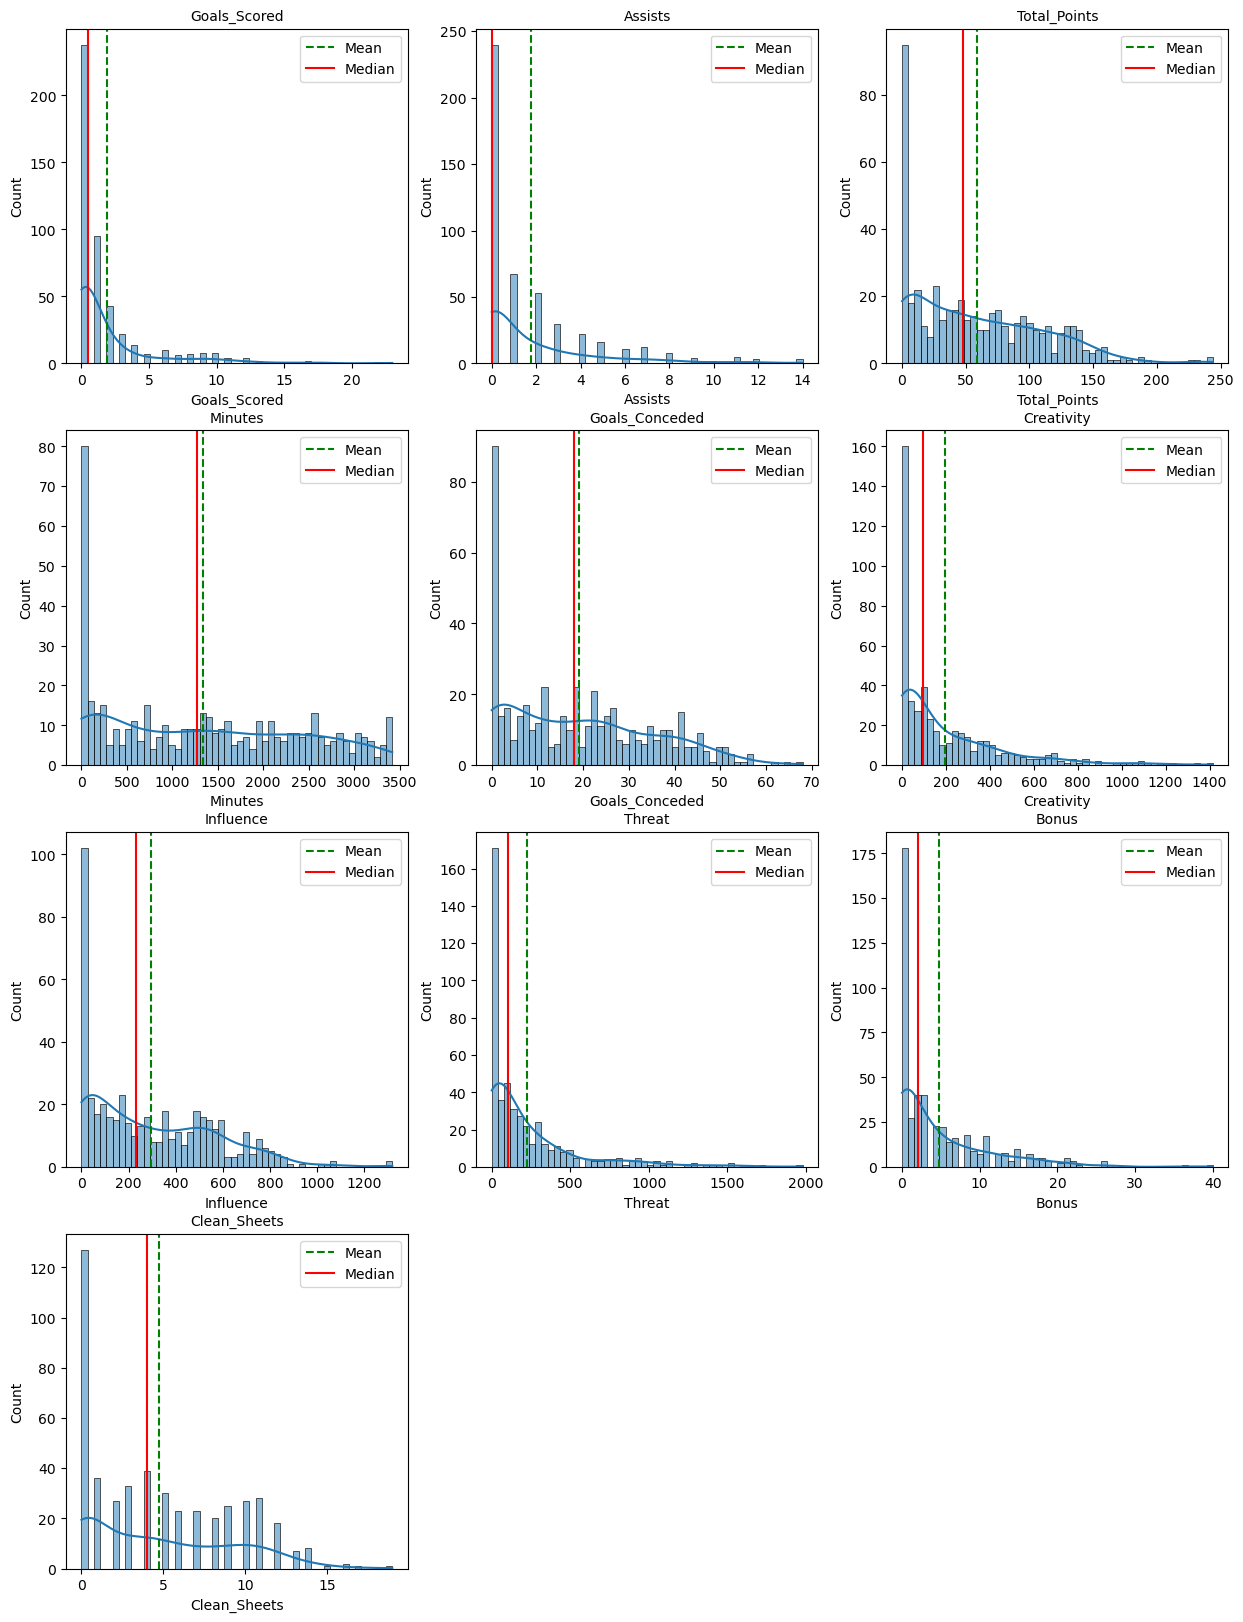

In [8]:
# Create a distribution plot for every numerical variable

numerical_cols = df.select_dtypes(include=['number']).columns.to_list() # dimishing our dataset to te numerical features
num_cols = 3 # we want to plot 3 histograms in a row
num_rows = len(numerical_cols) // num_cols + (1 if len(numerical_cols) % num_cols > 0 else 0) # calculating how much rows we need

def plot_histogram(df, feature, ax): # our function just for the plot
    sns.histplot(data=df, x=feature, kde=True, ax=ax, bins=50)
    ax.axvline(df[feature].mean(), color='green', linestyle='--', label='Mean')
    ax.axvline(df[feature].median(), color='red', linestyle='-', label='Median')
    ax.legend()
    ax.set_title(feature, fontsize=10)
    
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5)) 
axes = axes.flatten()

for i,feature in enumerate(numerical_cols):
    plot_histogram(df, feature, axes[i])

for j in range(i + 1, len(axes)): # delete empty subplots
    # value of i given through the last loop = 9, (0-9), add 1 to bring it to the real lenght of the list
    # compare it with the len of generated axes = 12
    # So start with the 10 and iterate to len(axes) --> for this iteration intervall delete the empty plot
    fig.delaxes(axes[j])
    
plt.show()

**What did I do**
- Bring all numerical features to a list
- Set the settings for our plots -> I want 3 plots in each row. Therefore we need to generate the suitable rows. For 10 numerical features we need 4 rows where 2 plots on the 4th row need to be deleted
- I generated a function for the histogram plot 
- I iterated over my numerical feature list and use my plot function for each feature to plot the histogram
- Then I deleted the two plots that where not filled

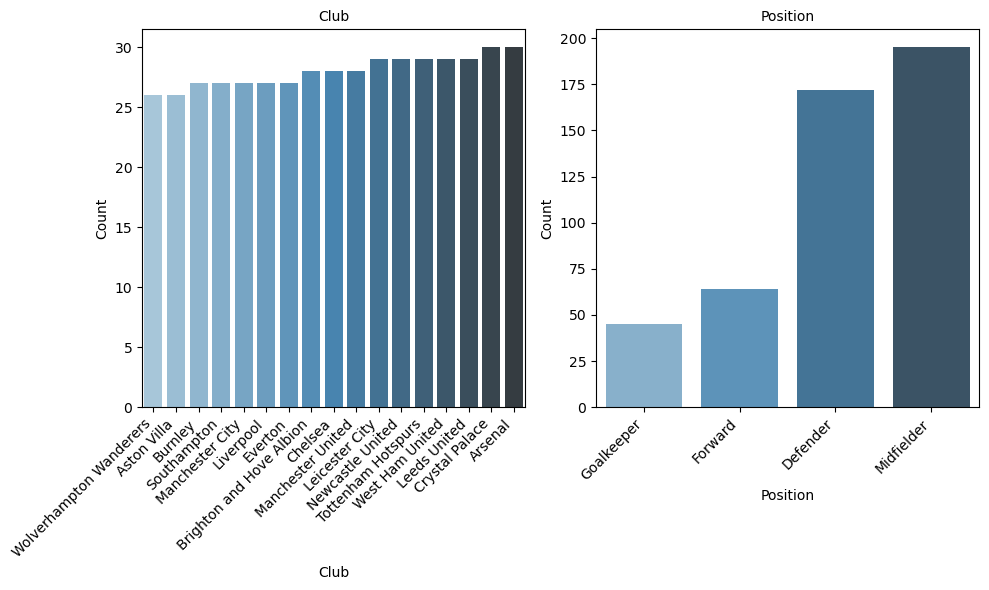

In [50]:
# Create a plot for every numerical variable
categorial_cols = df.select_dtypes(include='object').columns.to_list()
categorial_cols.pop(0) # we dont need to have a look at the players

num_cols = 2
num_rows = len(categorial_cols) // num_cols + (1 if len(categorial_cols) % num_cols > 0 else 0)

def plot_barchart(df, feature, ax):
    order = df[feature].value_counts().sort_values(ascending=True).index
    sns.countplot(x=feature, data=df, ax=ax, palette='Blues_d', order=order)
    ax.set_title(feature, fontsize=10)
    ax.set_xlabel(feature)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_ylabel('Count')

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6)) 
axes = axes.flatten()
    
for i, f in enumerate(categorial_cols):
    plot_barchart(df, f, axes[i])
    
# delete empty columns
for j in range(i+1, len(categorial_cols)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

### Multivariate Analysis


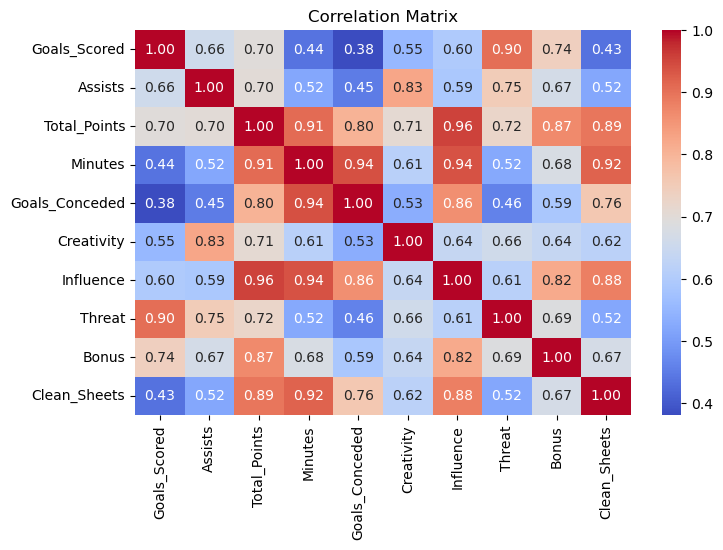

In [57]:
# First we want to create a correlation matrix for our numerical features
num_features = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = num_features.corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()         

/Users/philippgunther/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


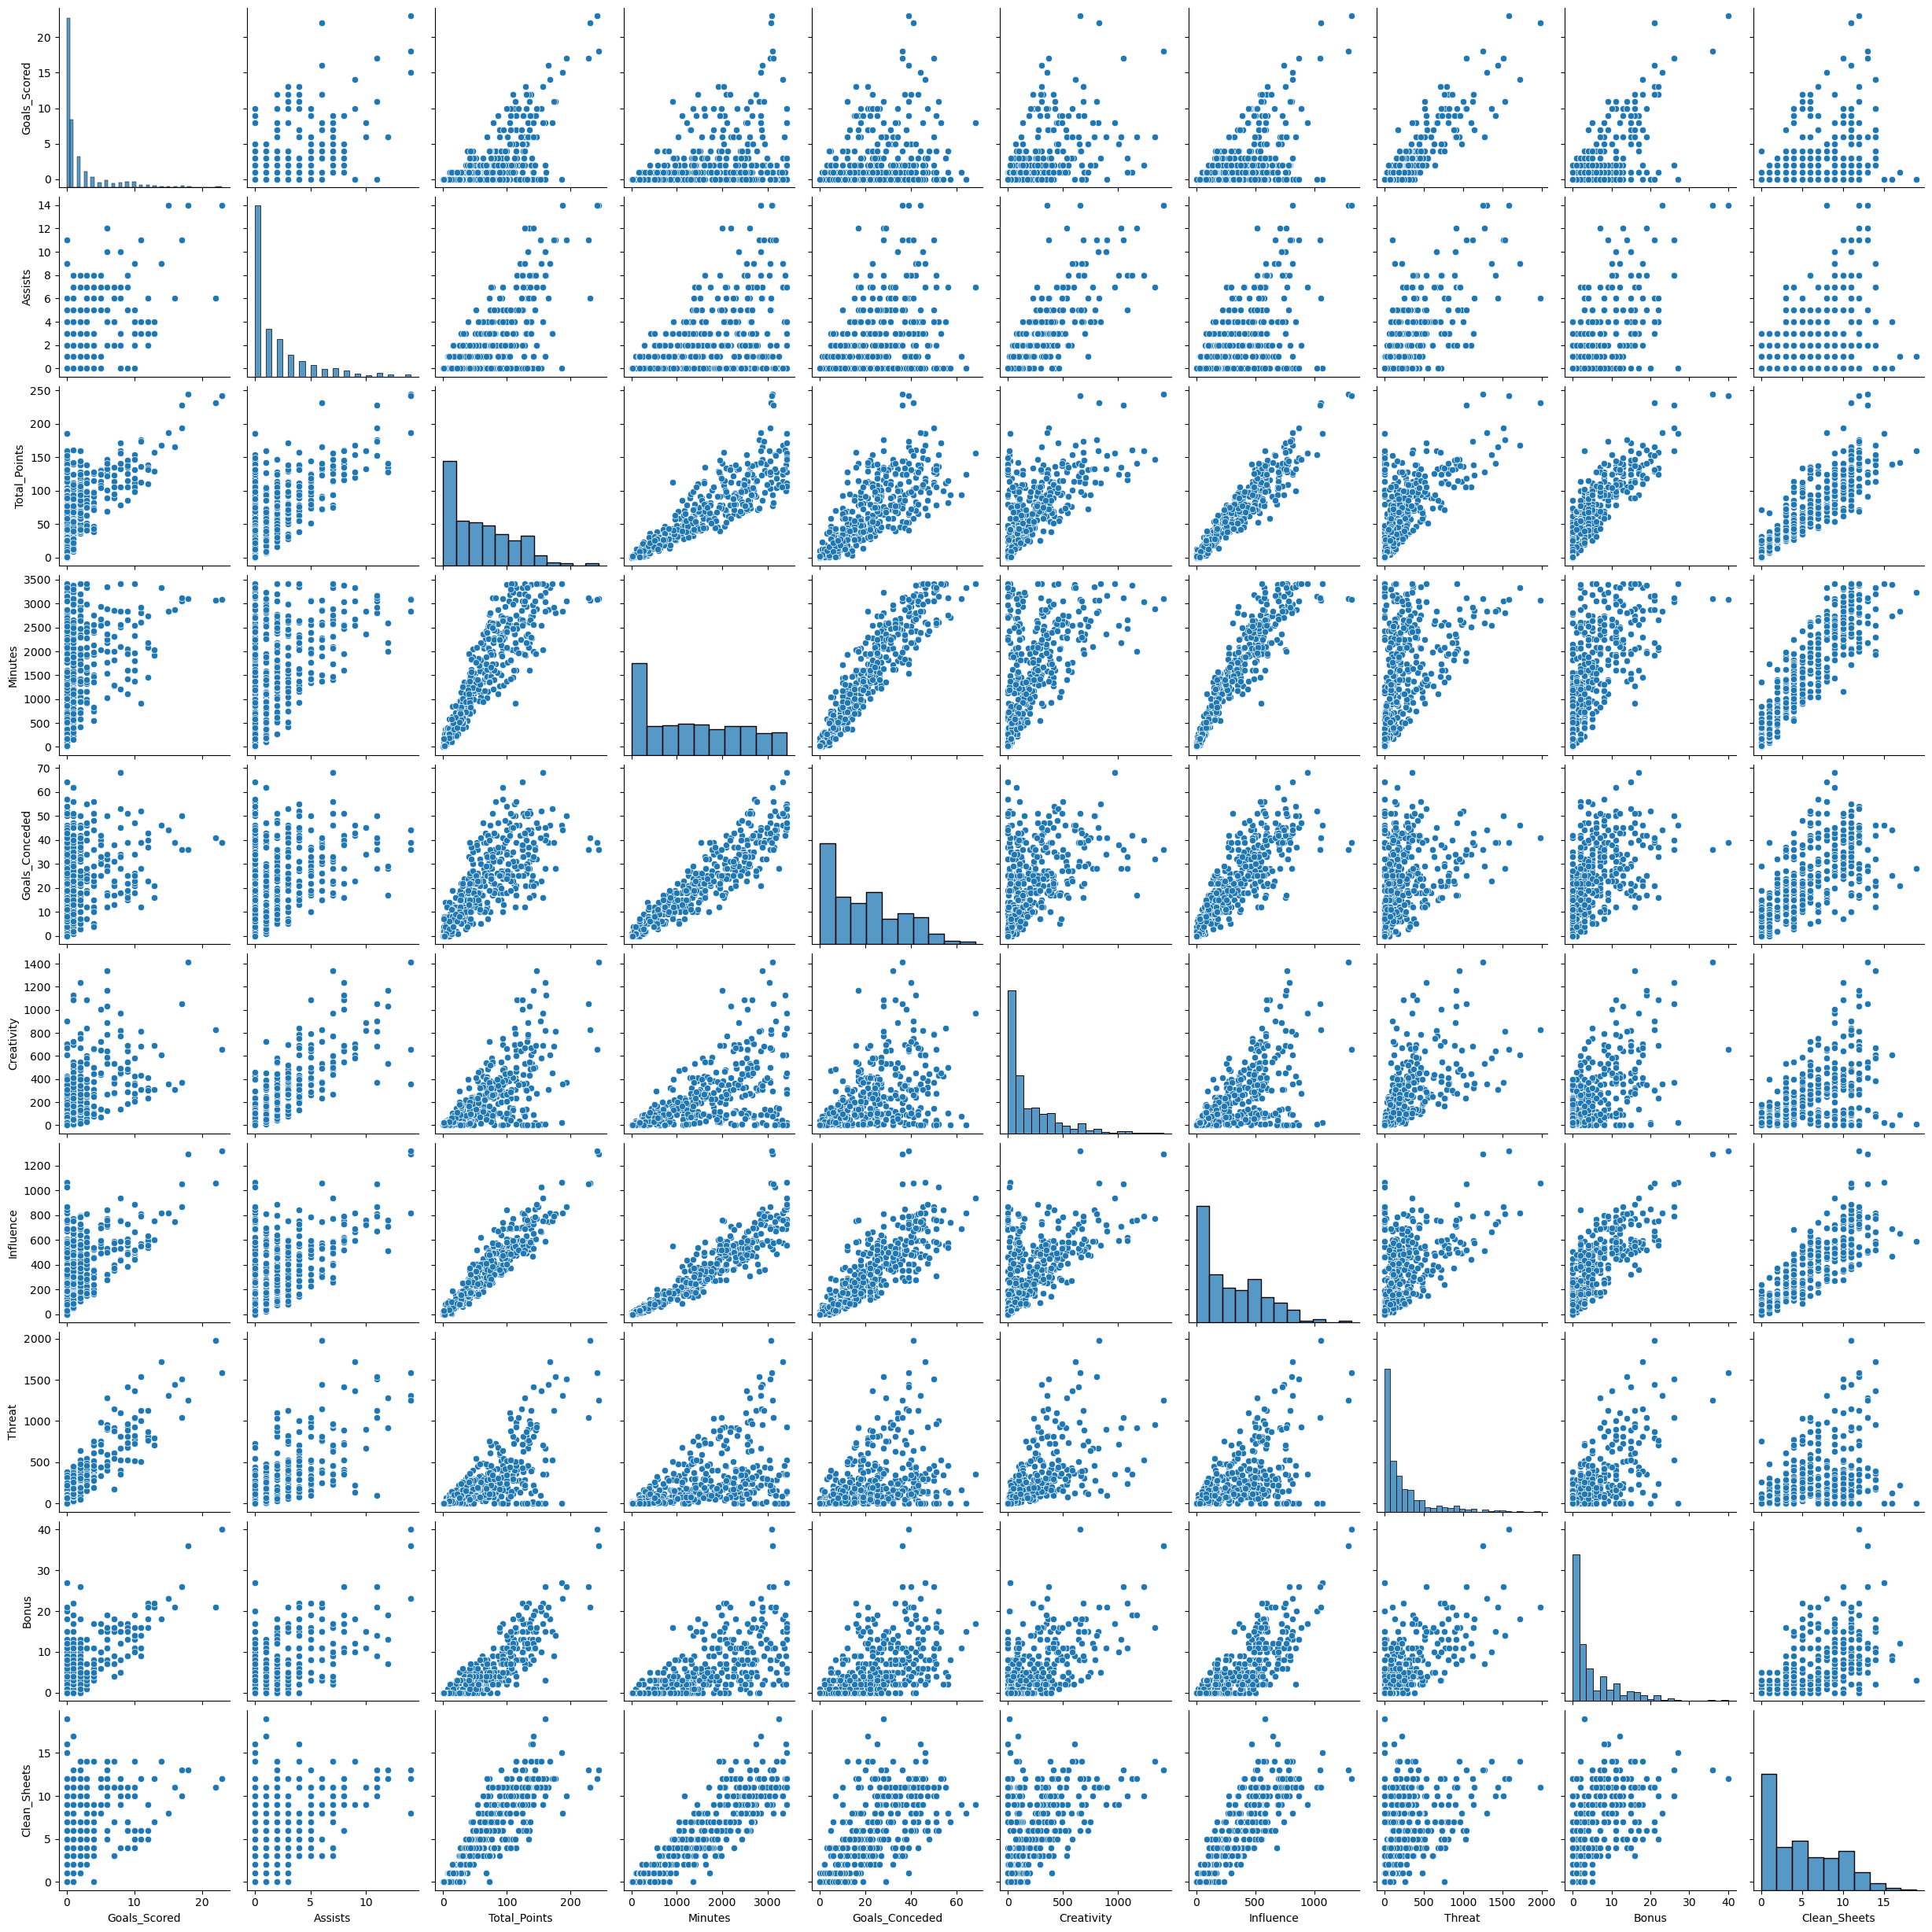

In [58]:
# To have a look at the relationships between our numerical features
sns.pairplot(df)
plt.show()

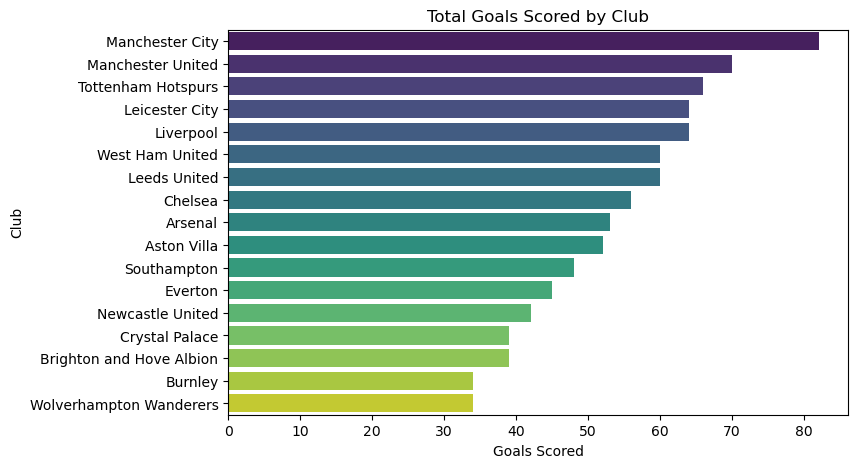

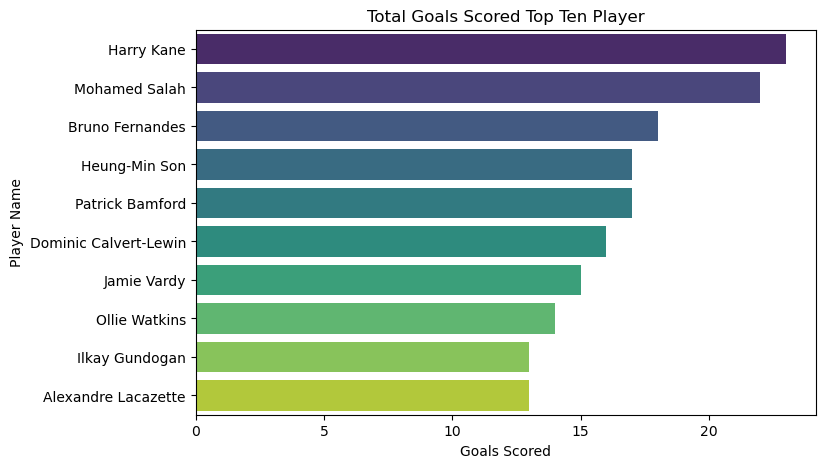

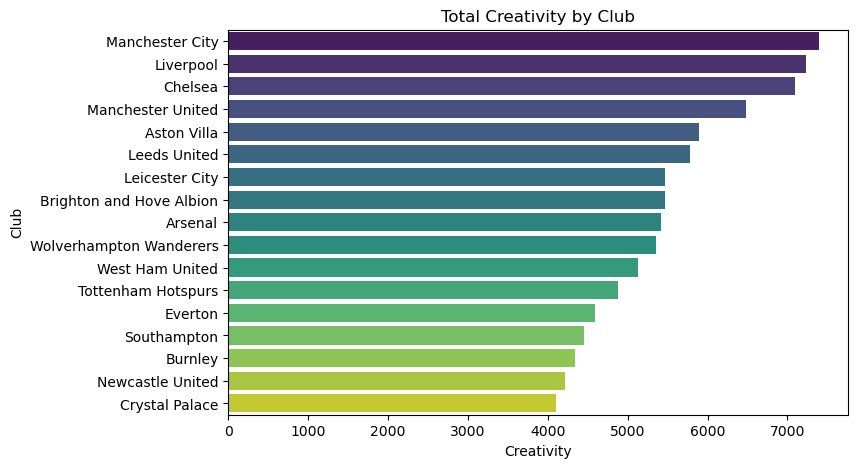

In [101]:
# We can also create plots to find insights between categorical and numerical variables --> for example:
    # 1. How many goals per club
    # 2. Top ten scorer of the ligue
    # 3. Which club has the most creativity score
    
def goals_per_club():
    df_g_p_c = df.groupby('Club')['Goals_Scored'].sum().reset_index()
    df_g_p_c_sorted = df_g_p_c.sort_values(by='Goals_Scored', ascending=False)   
    
    plt.figure(figsize=(8, 5))
    
    sns.barplot(x='Goals_Scored', y='Club', data=df_g_p_c_sorted, palette='viridis')
    plt.xlabel('Goals Scored')
    plt.ylabel('Club')
    plt.title('Total Goals Scored by Club')
    plt.show()


def top_ten_scorer():
    df_t_t_s = df.groupby('Player_Name')['Goals_Scored'].sum().reset_index()
    df_t_t_s = df_t_t_s.sort_values(by='Goals_Scored', ascending=False).reset_index()
    df_t_t_s = df_t_t_s.iloc[0:10, :]
    
    plt.figure(figsize=(8,5))
    
    sns.barplot(x='Goals_Scored', y='Player_Name', data=df_t_t_s, palette='viridis')
    plt.xlabel('Goals Scored')
    plt.ylabel('Player Name')
    plt.title('Total Goals Scored Top Ten Player')
    plt.show()
    
def creativity_per_club():
    df_c_p_c = df.groupby('Club')['Creativity'].sum().reset_index()
    df_c_p_c_sorted = df_c_p_c.sort_values(by='Creativity', ascending=False)
    
    plt.figure(figsize=(8,5))
    
    sns.barplot(x='Creativity', y='Club', data=df_c_p_c_sorted, palette='viridis')
    plt.xlabel('Creativity')
    plt.ylabel('Club')
    plt.title('Total Creativity by Club')
    plt.show()

goals_per_club()
top_ten_scorer()
creativity_per_club()

- We could also used a function and loop for that analysis but I choose this way 

## Building the Cluster Models

## K-Means Clustering

### Scaling the data

In [69]:
# Scaling the data before clustering
scaler = StandardScaler()
subset = df.iloc[:, 3:].copy() # creates a subset of the df starting with 4 column since we are scaling our numerical data
subset_scaled = scaler.fit_transform(subset)

In [70]:
subset_scaled_df = pd.DataFrame(subset_scaled, columns = subset.columns)
subset_scaled_df.head()
subset_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Goals_Scored    476 non-null    float64
 1   Assists         476 non-null    float64
 2   Total_Points    476 non-null    float64
 3   Minutes         476 non-null    float64
 4   Goals_Conceded  476 non-null    float64
 5   Creativity      476 non-null    float64
 6   Influence       476 non-null    float64
 7   Threat          476 non-null    float64
 8   Bonus           476 non-null    float64
 9   Clean_Sheets    476 non-null    float64
dtypes: float64(10)
memory usage: 37.3 KB


### Applying PCA

In [71]:
# Importing PCA
from sklearn.decomposition import PCA

# Defining the number of principal components to generate
n = subset.shape[1]  # n contains 10 values
pca = PCA(n_components = n, random_state = 1)                       
data_pca = pd.DataFrame(pca.fit_transform(subset_scaled_df ))       

# The percentage of variance explained by each principal component is stored
exp_var = (pca.explained_variance_ratio_)

data_pca.head()
print(exp_var)

[0.72148934 0.13659346 0.05880028 0.03138379 0.02274545 0.01522727
 0.00700781 0.00393725 0.00194529 0.00087005]


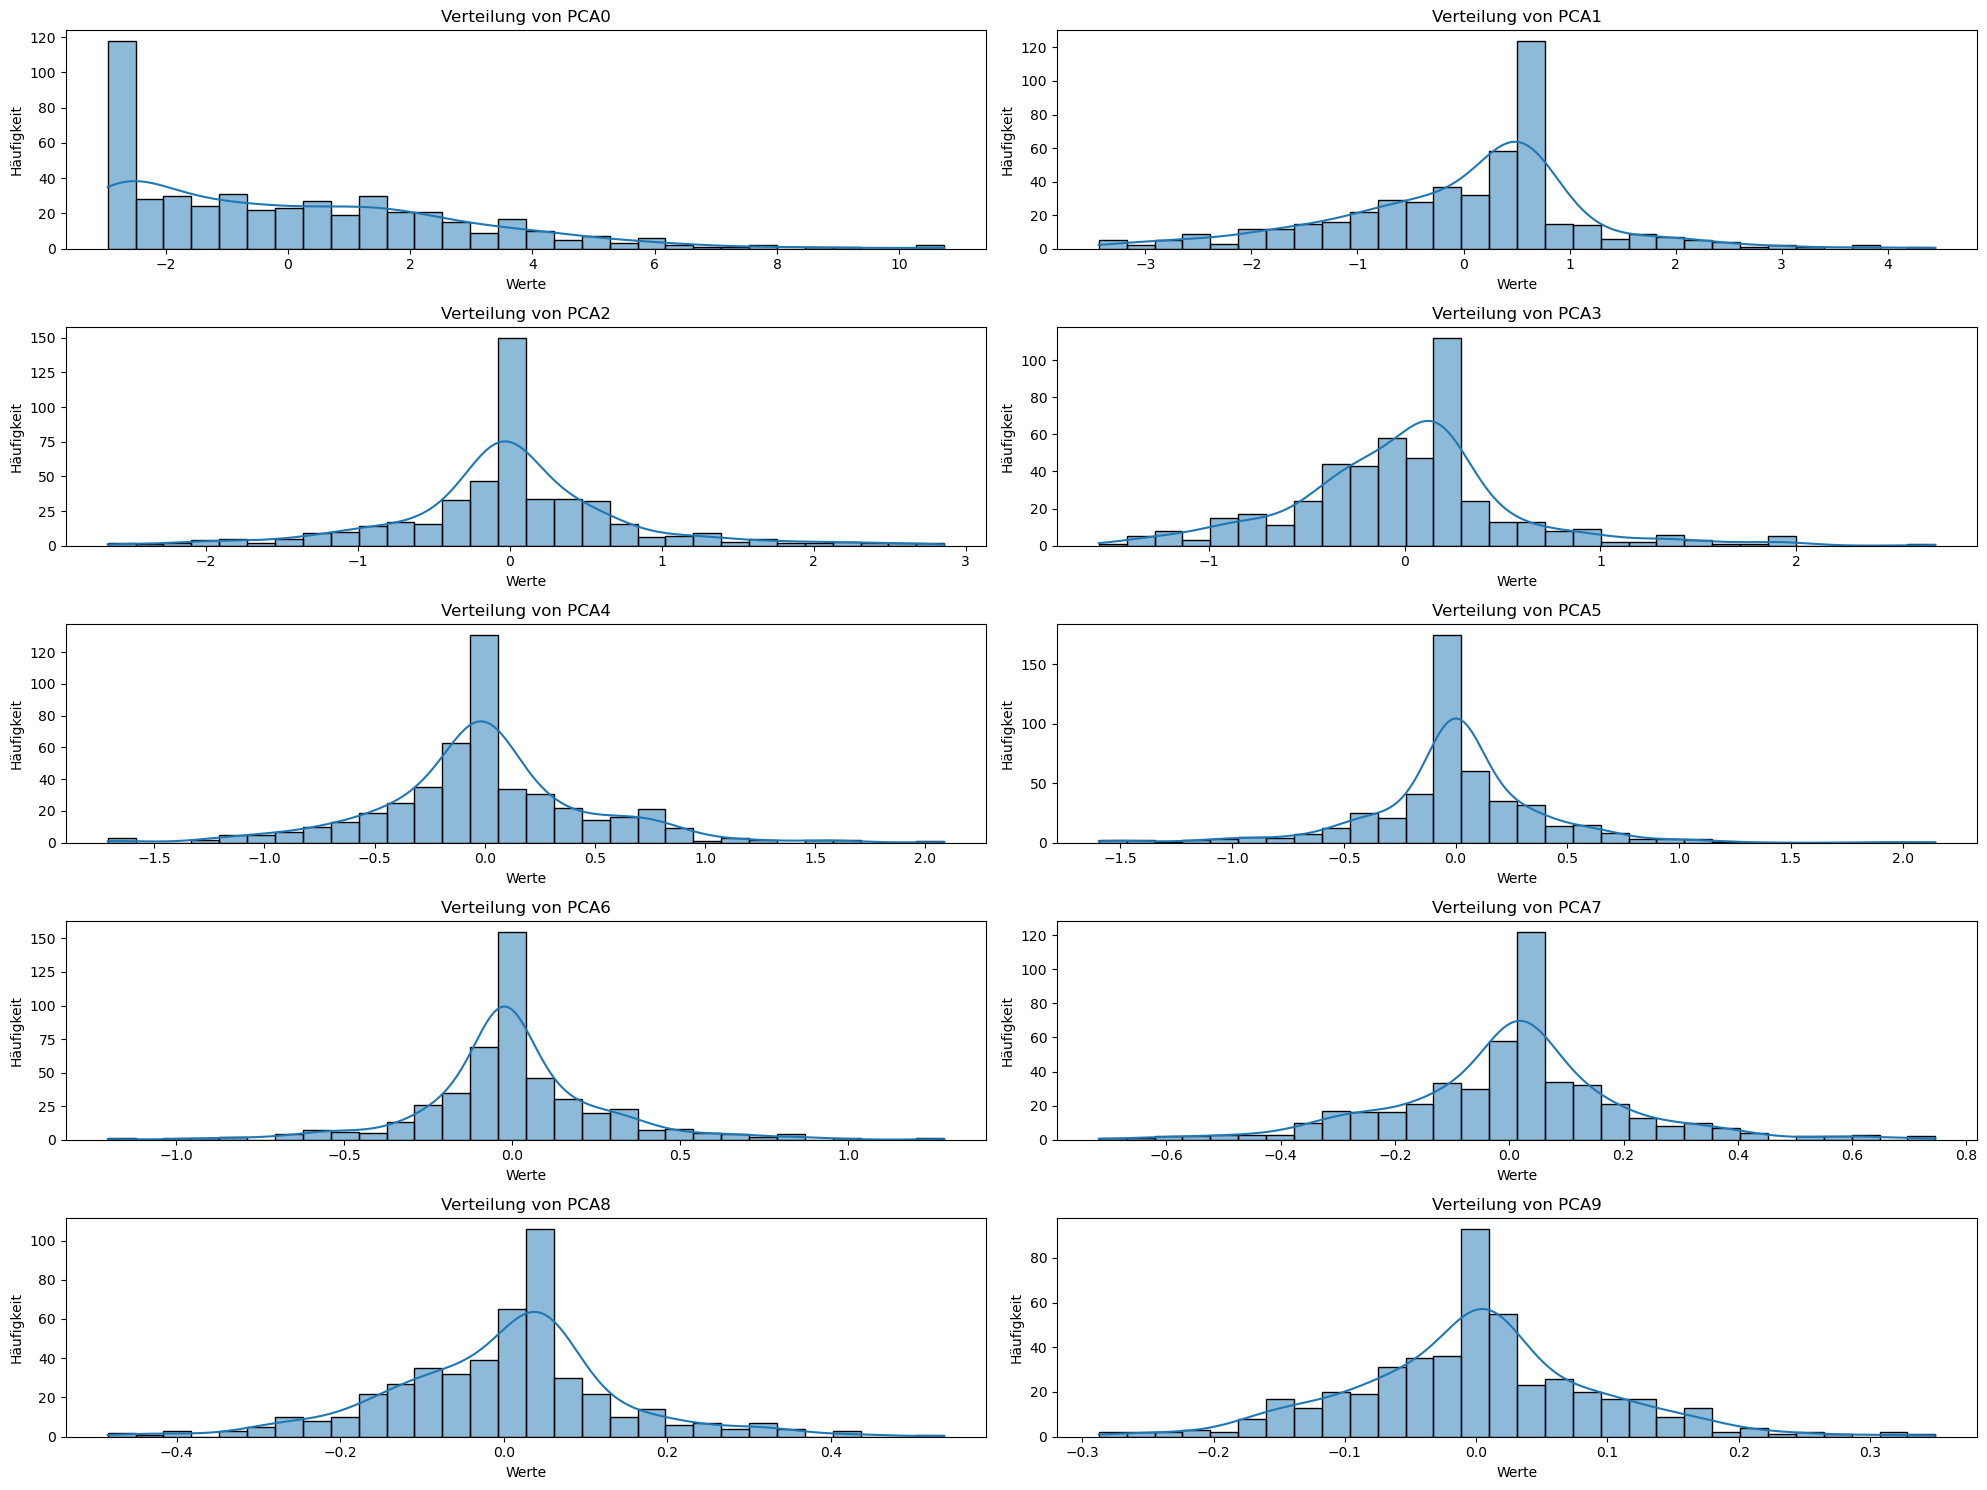

In [72]:
# Show me the distribution for the PCAs
plt.figure(figsize=(20, 15))

for i in range(10):
    plt.subplot(5, 2, i + 1)
    sns.histplot(data_pca[i], kde=True, bins=30)
    plt.title(f'Verteilung von PCA{i}')
    plt.xlabel('Werte')
    plt.ylabel('Häufigkeit')

plt.tight_layout()
plt.show()

In [73]:
# Which Features are influencing PCA0 - PCA9
loadings = pd.DataFrame(pca.components_, columns=subset.columns)

def get_top_features_for_pcs(loadings, num_features=5):
    top_features = {}
    for i, component in enumerate(loadings.iterrows()):
        component_name, values = component
        sorted_indices = np.argsort(np.abs(values))[::-1]  
        top_features[component_name] = loadings.columns[sorted_indices[:num_features]].tolist()
    return top_features

top_features = get_top_features_for_pcs(loadings)
for component, features in top_features.items():
    print(f"Top features for PCA{component}: {features}")

Top features for PCA0: ['Total_Points', 'Influence', 'Minutes', 'Bonus', 'Clean_Sheets']
Top features for PCA1: ['Goals_Scored', 'Threat', 'Goals_Conceded', 'Minutes', 'Assists']
Top features for PCA2: ['Creativity', 'Assists', 'Goals_Scored', 'Bonus', 'Threat']
Top features for PCA3: ['Bonus', 'Goals_Conceded', 'Threat', 'Minutes', 'Goals_Scored']
Top features for PCA4: ['Clean_Sheets', 'Goals_Conceded', 'Bonus', 'Threat', 'Assists']
Top features for PCA5: ['Assists', 'Creativity', 'Goals_Scored', 'Total_Points', 'Clean_Sheets']
Top features for PCA6: ['Threat', 'Goals_Scored', 'Bonus', 'Influence', 'Assists']
Top features for PCA7: ['Influence', 'Goals_Scored', 'Threat', 'Clean_Sheets', 'Goals_Conceded']
Top features for PCA8: ['Total_Points', 'Clean_Sheets', 'Influence', 'Goals_Conceded', 'Bonus']
Top features for PCA9: ['Minutes', 'Goals_Conceded', 'Total_Points', 'Clean_Sheets', 'Goals_Scored']


In [74]:
data_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       476 non-null    float64
 1   1       476 non-null    float64
 2   2       476 non-null    float64
 3   3       476 non-null    float64
 4   4       476 non-null    float64
 5   5       476 non-null    float64
 6   6       476 non-null    float64
 7   7       476 non-null    float64
 8   8       476 non-null    float64
 9   9       476 non-null    float64
dtypes: float64(10)
memory usage: 37.3 KB


### K-Means Clustering

In [83]:
k_means_df = data_pca.copy()
k_means_df.head()

,0,1,2,3,4,5,6,7,8,9
0,-2.916600,0.569939,-0.041871,0.190663,0.003485,0.008158,-0.042314,0.064757,0.057486,0.006269
1,3.815468,1.999554,-2.216345,0.757341,-0.119000,-0.541975,-0.233941,-0.293053,0.075356,-0.238019
2,1.943396,-2.757446,-0.958238,0.816920,0.041188,0.376978,0.005235,0.138392,-0.306183,-0.136656
3,3.502427,1.043441,0.581995,-0.969567,0.415848,-0.358456,0.661746,0.376272,-0.260200,-0.155934
4,-1.153639,0.422189,0.642307,0.269271,-0.271583,0.405367,-0.033575,0.098886,-0.035234,-0.034877


/Users/philippgunther/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/philippgunther/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/philippgunther/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/philippgunther/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default 

Number of Clusters: 1 	Average Distortion: 2.773037110097803
Number of Clusters: 2 	Average Distortion: 1.8635736785898267
Number of Clusters: 3 	Average Distortion: 1.5612774038101602
Number of Clusters: 4 	Average Distortion: 1.3557368359611877


/Users/philippgunther/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/philippgunther/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/philippgunther/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of Clusters: 5 	Average Distortion: 1.293154169974169
Number of Clusters: 6 	Average Distortion: 1.2242272213869854
Number of Clusters: 7 	Average Distortion: 1.1610308747131397
Number of Clusters: 8 	Average Distortion: 1.1103362182250378


/Users/philippgunther/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/philippgunther/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/philippgunther/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of Clusters: 9 	Average Distortion: 1.0659533211208418
Number of Clusters: 10 	Average Distortion: 1.0174279276513458
Number of Clusters: 11 	Average Distortion: 1.0021422442688899


/Users/philippgunther/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/philippgunther/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/philippgunther/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of Clusters: 12 	Average Distortion: 0.9834185498732169
Number of Clusters: 13 	Average Distortion: 0.9673126134780365
Number of Clusters: 14 	Average Distortion: 0.947501432372712


/Users/philippgunther/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


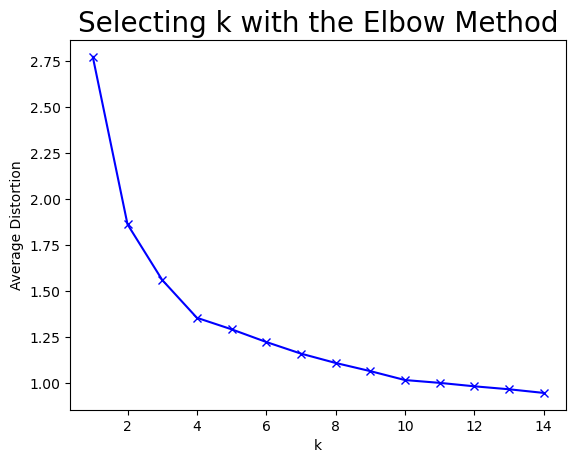

In [76]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters = k, random_state = 1)
    model.fit(data_pca)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis = 1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize = 20)
plt.show()

In [77]:
kmeans = KMeans(n_clusters = 4, random_state = 1)
kmeans.fit(k_means_df)

/Users/philippgunther/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=1)

In [93]:
# Bringing the dataset together

# Adding K-Means cluster labels to the K-Means and original dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1 = pd.concat([df, k_means_df["KM_segments"].reset_index(drop=True)], axis=1)
df1["KM_segments"] = kmeans.labels_
df1.head()

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,KM_segments
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0,1
1,Alexandre Lacazette,Arsenal,Forward,13,3,129,1916,21,307.4,602.4,797,21,7,2
2,Bernd Leno,Arsenal,Goalkeeper,0,0,131,3131,37,0.0,702.2,2,11,11,0
3,Bukayo Saka,Arsenal,Midfielder,5,5,114,2554,31,650.6,493.0,984,8,8,2
4,Calum Chambers,Arsenal,Defender,0,3,36,751,10,169.4,171.8,77,3,2,3


In [96]:
df1.columns

Index(['Player_Name', 'Club', 'Position', 'Goals_Scored', 'Assists',
       'Total_Points', 'Minutes', 'Goals_Conceded', 'Creativity', 'Influence',
       'Threat', 'Bonus', 'Clean_Sheets', 'KM_segments'],
      dtype='object')

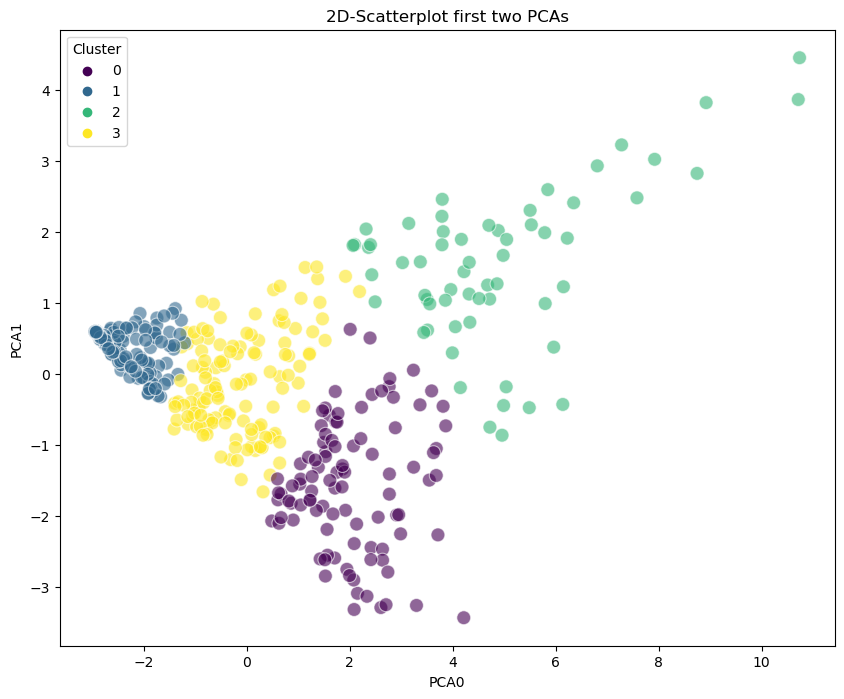

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplot der ersten zwei Hauptkomponenten mit den Cluster-Labels
plt.figure(figsize=(10, 8))
sns.scatterplot(x=0, y=1, hue='KM_segments', data=k_means_df, palette='viridis', s=100, alpha=0.6)
plt.title('2D-Scatterplot first two PCAs')
plt.xlabel('PCA0')
plt.ylabel('PCA1')
plt.legend(title='Cluster')
plt.show()


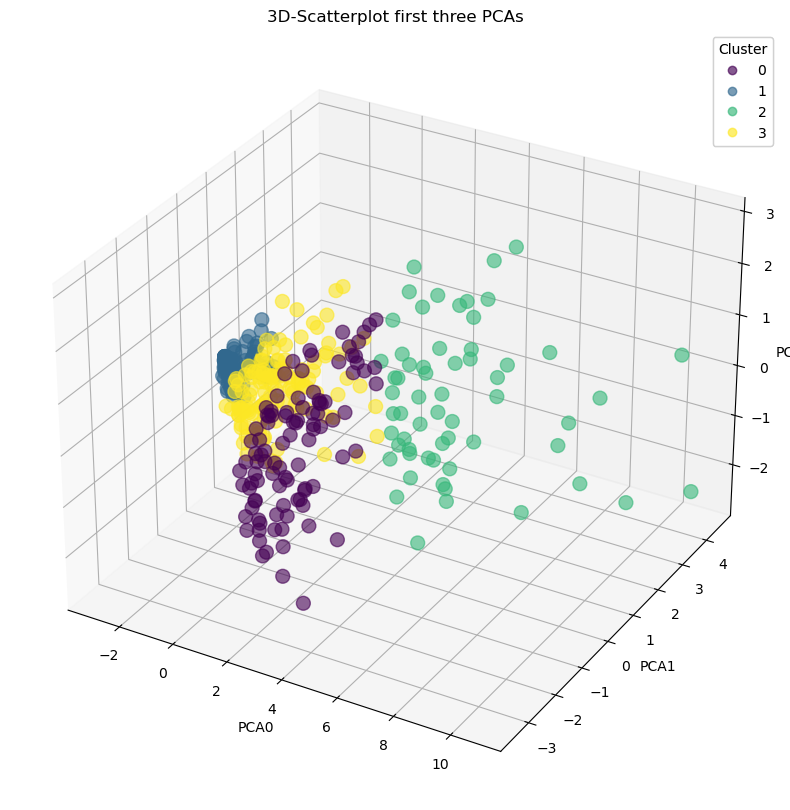

In [100]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(k_means_df[0], k_means_df[1], k_means_df[2], c=k_means_df['KM_segments'], cmap='viridis', s=100, alpha=0.6)
legend = ax.legend(*scatter.legend_elements(), title='Cluster')
ax.add_artist(legend)
ax.set_title('3D-Scatterplot first three PCAs')
ax.set_xlabel('PCA0')
ax.set_ylabel('PCA1')
ax.set_zlabel('PCA2')
plt.show()


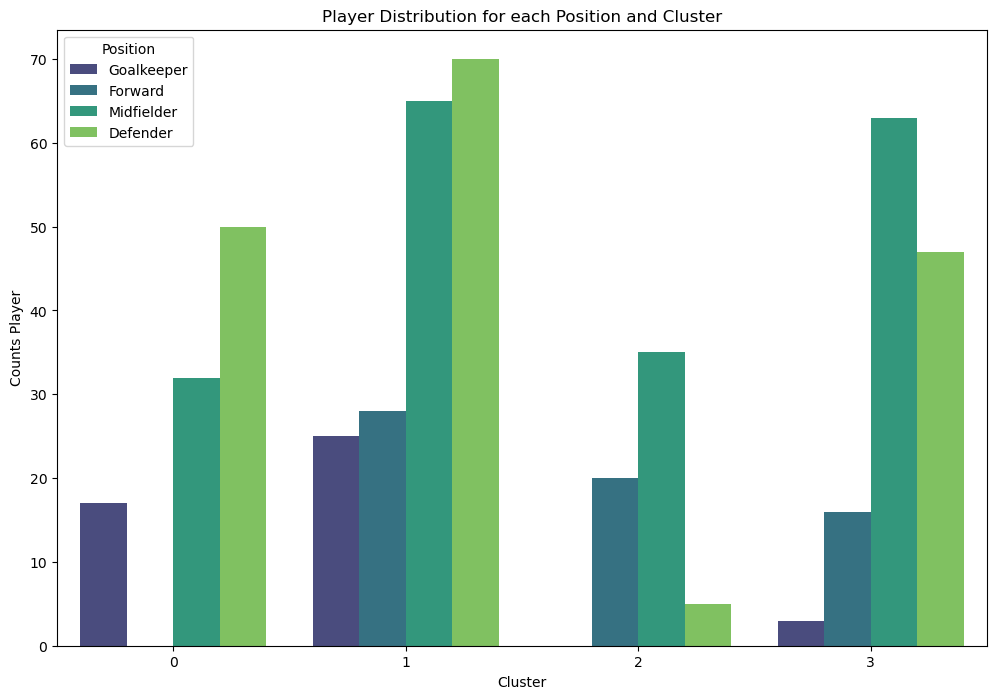

In [107]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df1, x='KM_segments', hue='Position', palette='viridis')
plt.title('Player Distribution for each Position and Cluster')
plt.xlabel('Cluster')
plt.ylabel('Counts Player')
plt.legend(title='Position')
plt.show()


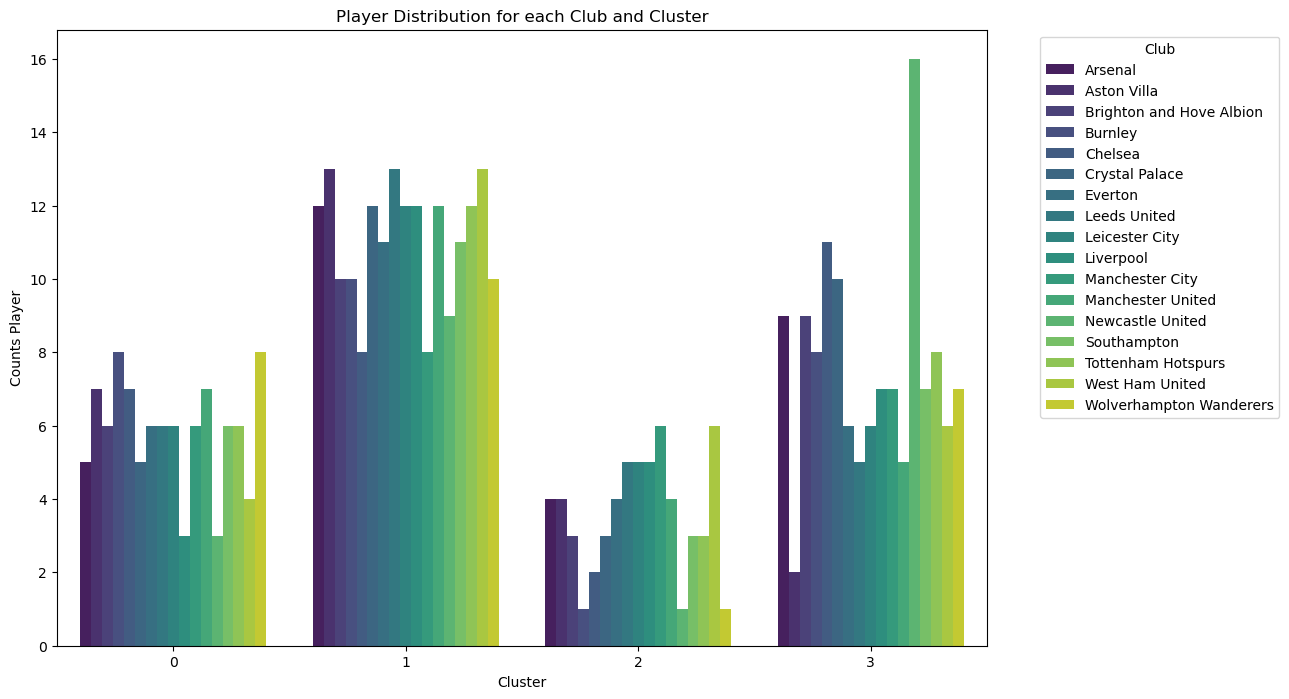

In [104]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df1, x='KM_segments', hue='Club', palette='viridis')
plt.title('Player Distribution for each Club and Cluster')
plt.xlabel('Cluster')
plt.ylabel('Counts Player')
plt.legend(title='Club', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


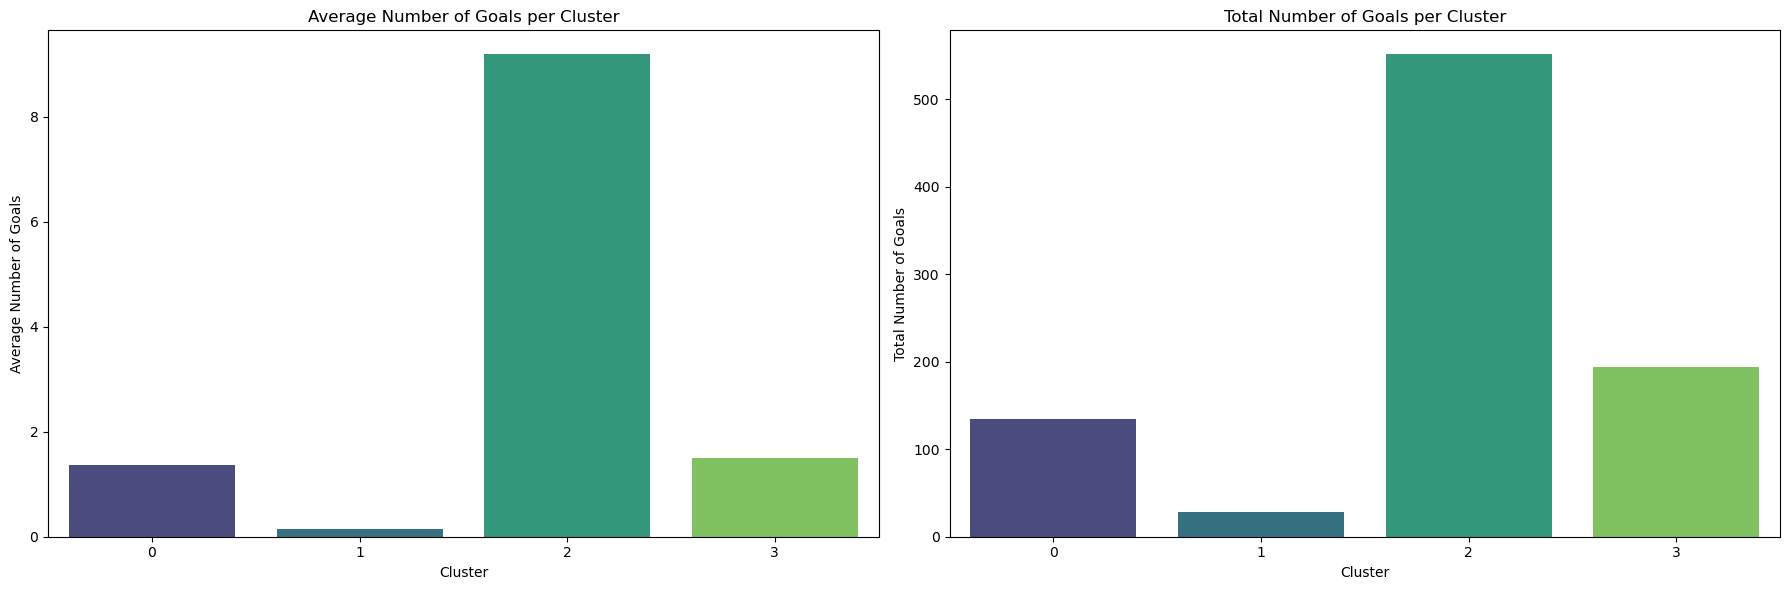

In [132]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(data=avg_goals_per_cluster, x='KM_segments', y='Goals_Scored', palette='viridis', ax=ax[0])
ax[0].set_title('Average Number of Goals per Cluster')
ax[0].set_xlabel('Cluster')
ax[0].set_ylabel('Average Number of Goals')

sns.barplot(data=total_goals_per_cluster, x='KM_segments', y='Goals_Scored', palette='viridis', ax=ax[1])
ax[1].set_title('Total Number of Goals per Cluster')
ax[1].set_xlabel('Cluster')
ax[1].set_ylabel('Total Number of Goals')

plt.tight_layout()
plt.show()

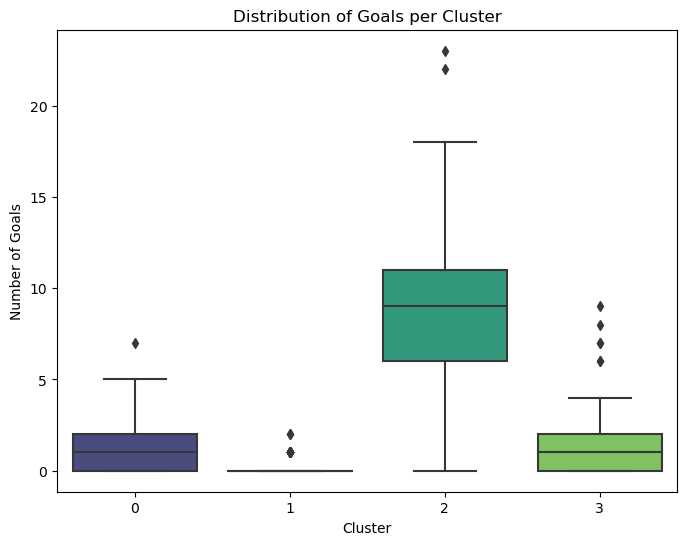

In [125]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, x='KM_segments', y='Goals_Scored', palette='viridis')
plt.title('Distribution of Goals per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Goals')
plt.show()


In [138]:
top_players = df1.groupby('KM_segments').apply(lambda x: x.nlargest(3, 'Total_Points')).reset_index(drop=True)
top_palyers = top_players[['KM_segments', 'Player_Name', 'Club', 'Total_Points']]
top_palyers.head(20)

,KM_segments,Player_Name,Club,Total_Points
0,0,Emiliano Martinez,Aston Villa,186
1,0,Ederson Moares,Manchester City,160
2,0,Illan Meslier,Leeds United,154
3,1,Joel Matip,Liverpool,42
4,1,Edward Nketiah,Arsenal,36
5,1,Gabriel Teodoro Martinelli Silva,Arsenal,36
6,2,Bruno Fernandes,Manchester United,244
7,2,Harry Kane,Tottenham Hotspurs,242
8,2,Mohamed Salah,Liverpool,231
9,3,Mason Greenwood,Manchester United,106


In [127]:
for cluster in df1["KM_segments"].unique():
    print(f"Players in Cluster {cluster}:")
    cluster_players = df1[df1["KM_segments"] == cluster][["Player_Name", "Goals_Scored"]]
    print(cluster_players)
    print()


Players in Cluster 1:
                          Player_Name  Goals_Scored
0                     Alex Runnarsson             0
5                       Cedric Soares             0
8                      Edward Nketiah             2
11   Gabriel Teodoro Martinelli Silva             2
16                         Matt Macey             0
..                                ...           ...
463                        Oskar Buur             0
464                     Owen Otasowie             0
465                   Patrick Cutrone             0
471                     Ruben Vinagre             0
473                    Vitor Ferreira             0

[188 rows x 2 columns]

Players in Cluster 2:
                   Player_Name  Goals_Scored
1          Alexandre Lacazette            13
3                  Bukayo Saka             5
19                Nicolas Pepe            10
21   Pierre-Emerick Aubameyang            10
31              Anwar El Ghazi            10
32             Bertrand Traore       

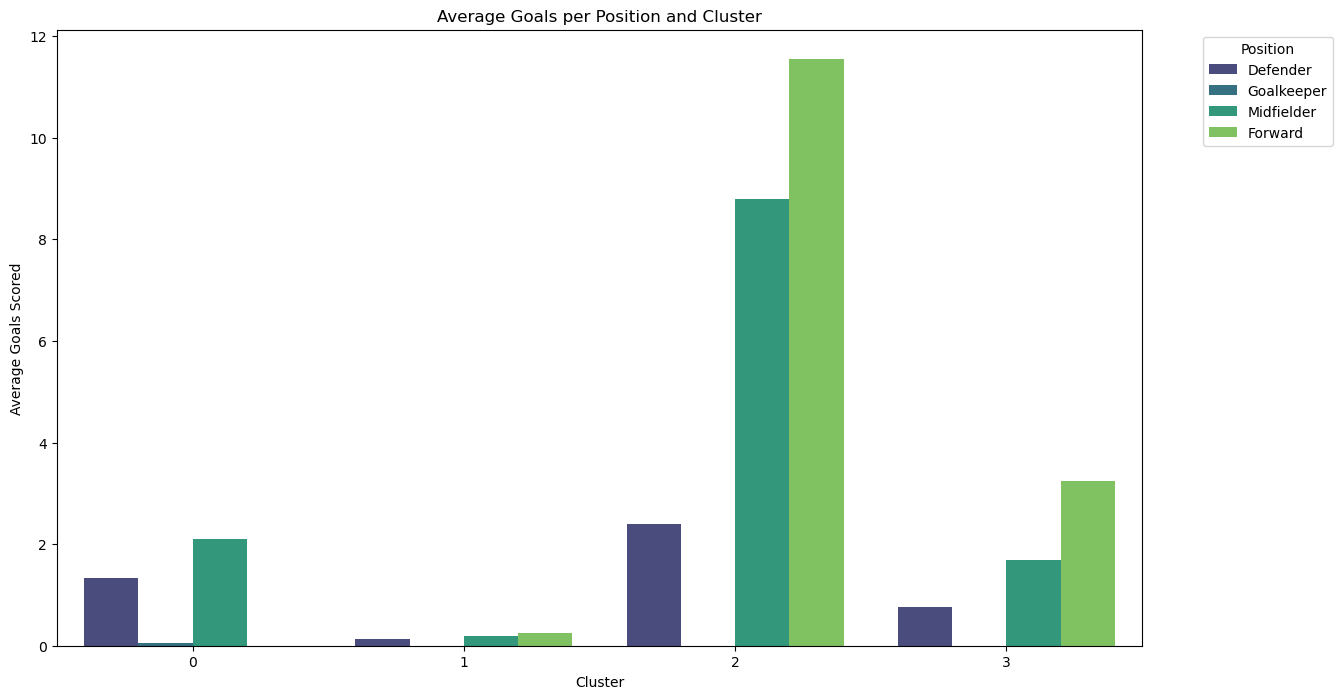

In [131]:
avg_goals_per_position_cluster = df1.groupby(['KM_segments', 'Position'])['Goals_Scored'].mean().reset_index()

# Visualisierung der durchschnittlichen Tore pro Position und Cluster
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_goals_per_position_cluster, x='KM_segments', y='Goals_Scored', hue='Position', palette='viridis')
plt.title('Average Goals per Position and Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Goals Scored')
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
